# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [31]:
# Import data
air_quality = pd.read_csv("c4_epa_air_quality.csv")
air_quality = air_quality.dropna()

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [32]:
# Code Here
air_quality.head()



,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [33]:
# Code Here
air_quality.info()


<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 259
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        257 non-null    int64  
 1   date_local        257 non-null    object 
 2   state_name        257 non-null    object 
 3   county_name       257 non-null    object 
 4   city_name         257 non-null    object 
 5   local_site_name   257 non-null    object 
 6   parameter_name    257 non-null    object 
 7   units_of_measure  257 non-null    object 
 8   arithmetic_mean   257 non-null    float64
 9   aqi               257 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.1+ KB


In [34]:
# Code Here
air_quality.describe()


,Unnamed: 0,arithmetic_mean,aqi
count,257.000000,257.000000,257.000000
mean,129.766537,0.404578,6.782101
std,74.675286,0.319311,7.091422
min,0.000000,0.000000,0.000000
25%,66.000000,0.200000,2.000000
50%,130.000000,0.278947,5.000000
75%,194.000000,0.516667,9.000000
max,259.000000,1.921053,50.000000


**Question:** What time range does this data cover?

In [51]:
# Code Here
print(air_quality.columns.tolist())  # Verify exact column names

start_date = air_quality['date_local'].min()
end_date = air_quality['date_local'].max()

# Display the time range covered
start_date, end_date



['Unnamed: 0', 'date_local', 'state_name', 'county_name', 'city_name', 'local_site_name', 'parameter_name', 'units_of_measure', 'arithmetic_mean', 'aqi']


('2018-01-01', '2018-01-01')

A:

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [52]:
# Code Here
# Get the minimum and maximum AQI values in the dataset
min_aqi = air_quality['aqi'].min()
max_aqi = air_quality['aqi'].max()

# Display the results
min_aqi, max_aqi


(0, 50)

**Question:** Are all states equally represented in the dataset?

In [53]:
# Code Here
state_counts =air_quality['state_name'].value_counts()

In [55]:
# Code Here
state_counts

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania             9
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Oregon                   2
Montana                  2
Alaska                   2
Tennessee                2
Washington               2
Idaho                    2
Rhode Island     

A:

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [ ]:

# Create a list of RRE states
rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]

# Subset the dataset to only include these states
aqi_rre = air_quality[air_quality["state_name"].isin(rre_states)]

# Calculate the mean AQI for each of these states
mean_aqi_rre = aqi_rre.groupby("state_name")["aqi"].mean().reset_index()


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [58]:
# Import seaborn as sns.
import seaborn as sns
import matplotlib.pyplot as plt

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

/var/folders/dd/h93zssnj4z16y7nnmv_h9f3r0000gn/T/ipykernel_1754/816296172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_aqi, x="state_name", y="aqi", palette="Set2")


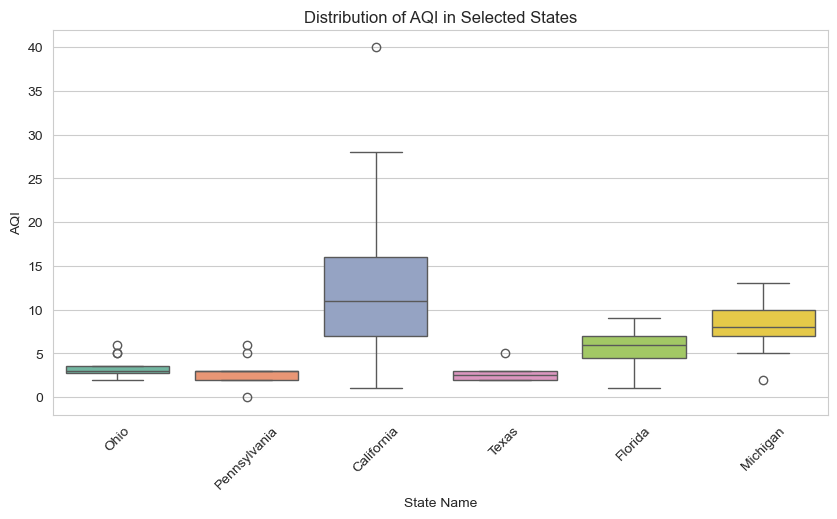

In [61]:
# Code Here

# Filter the dataset for the specified states
rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]
filtered_aqi = air_quality[air_quality["state_name"].isin(rre_states)]

# Create a boxplot showing the distribution of AQI for the selected states
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.boxplot(data=filtered_aqi, x="state_name", y="aqi", palette="Set2")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Labels and title
plt.xlabel("State Name")
plt.ylabel("AQI")
plt.title("Distribution of AQI in Selected States")

# Show the plot
plt.show()



**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A:  california

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [62]:
# Find the mean aqi for CA state.

# Calculate the mean AQI for California
mean_aqi_ca = air_quality[air_quality["state_name"] == "California"]["aqi"].mean()

# Display the result
mean_aqi_ca


12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [ ]:
# Input your confidence level here:
confidence_level = 0.95  


### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [66]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.


# Lastly, use the preceding result to calculate your margin of error.

# Compute mean and standard error

std_error = stats.sem(air_quality[air_quality["state_name"] == "California"]["aqi"])


# Set confidence level and corresponding Z-score (for 95% confidence level)
z_value = 1.96  

# Calculate Margin of Error (ME)
margin_of_error = z_value * std_error

# Display result
margin_of_error



1.7614930896609726

### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [67]:
# Calculate your confidence interval (upper and lower limits).
# Calculate the confidence interval (upper and lower limits)
lower_bound = mean_aqi_ca - margin_of_error
upper_bound = mean_aqi_ca + margin_of_error

# Display the confidence interval
(lower_bound, upper_bound)


(10.359719031551148, 13.882705210873095)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [68]:
# Import stats from scipy.
from scipy import stats

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [69]:
# Code Here
# Recalculate the confidence interval using stats.norm.interval()
confidence_level = 0.95  # 95% confidence level
lower_bound, upper_bound = stats.norm.interval(confidence_level, loc=mean_aqi_ca, scale=std_error)

# Display the recalculated confidence interval
(lower_bound, upper_bound)


(10.359751399400034, 13.882672843024208)

# Considerations

**What are some key takeaways that you learned from this project?**

A:California had the highest AQI levels, indicating that air quality regulations may need to be stricter there compared to other states.

**What findings would you share with others?**

A:Different states have varying AQI distributions, suggesting that air quality policies should be tailored to specific regions.

**What would you convey to external readers?**

A:This study highlights the importance of data-driven decision-making in air quality policies.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 